In [84]:
# Min-max normalization
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/jaeeponde/IML_A1/IML_A1/Regression_Task/data/training_data.csv")
df


# Display the normalized dataframe

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,3.00,3.08,2.0,4,228,1,0,0,0,1,11.2
1,4.75,4.34,4.7,8,382,1,0,0,0,1,18.8
2,4.50,4.34,4.8,8,373,1,0,0,0,1,18.9
3,4.00,4.34,4.6,8,380,1,0,1,0,0,18.5
4,4.00,4.34,4.2,6,359,1,0,1,0,0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,3.75,4.50,4.3,6,350,1,0,1,0,0,17.0
507,3.75,4.34,4.3,6,386,1,0,0,0,1,18.7
508,4.00,3.42,3.0,6,267,1,0,1,0,0,13.6
509,3.50,3.02,2.3,4,246,0,1,0,0,1,12.6


In [85]:
df_train=df.drop(columns=['FUEL CONSUMPTION'])

In [86]:
df_normalized = (df_train - df_train.min()) / (df_train.max() - df_train.min())

In [87]:
df_normalized['FUEL CONSUMPTION'] = df['FUEL CONSUMPTION'].values
df_normalized

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,0.071429,0.048913,0.142857,0.111111,0.317136,1.0,0.0,0.0,0.0,1.0,11.2
1,0.571429,0.733696,0.528571,0.555556,0.710997,1.0,0.0,0.0,0.0,1.0,18.8
2,0.500000,0.733696,0.542857,0.555556,0.687980,1.0,0.0,0.0,0.0,1.0,18.9
3,0.357143,0.733696,0.514286,0.555556,0.705882,1.0,0.0,1.0,0.0,0.0,18.5
4,0.357143,0.733696,0.457143,0.333333,0.652174,1.0,0.0,1.0,0.0,0.0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,0.285714,0.820652,0.471429,0.333333,0.629156,1.0,0.0,1.0,0.0,0.0,17.0
507,0.285714,0.733696,0.471429,0.333333,0.721228,1.0,0.0,0.0,0.0,1.0,18.7
508,0.357143,0.233696,0.285714,0.333333,0.416880,1.0,0.0,1.0,0.0,0.0,13.6
509,0.214286,0.016304,0.185714,0.111111,0.363171,0.0,1.0,0.0,0.0,1.0,12.6


In [102]:
df_shuffled = df_normalized.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = 511 - 50  # 461 for training
train_data = df_shuffled.iloc[:train_size]
test_data = df_shuffled.iloc[train_size:]

# Extract features and target
X_train = train_data.drop(columns='FUEL CONSUMPTION').values
y_train = train_data['FUEL CONSUMPTION'].values
X_test = test_data.drop(columns='FUEL CONSUMPTION').values
y_test = test_data['FUEL CONSUMPTION'].values

In [103]:
import numpy as np
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

In [104]:
X_train_biased

array([[1.        , 0.21428571, 0.04891304, 0.18571429, 0.22222222,
        0.39897698],
       [1.        , 0.        , 0.23369565, 0.28571429, 0.33333333,
        0.42199488],
       [1.        , 0.35714286, 0.04891304, 0.14285714, 0.11111111,
        0.29411765],
       ...,
       [1.        , 0.21428571, 0.04891304, 0.11428571, 0.11111111,
        0.27621483],
       [1.        , 0.14285714, 0.04891304, 0.17142857, 0.11111111,
        0.34526854],
       [1.        , 0.21428571, 0.33695652, 0.18571429, 0.11111111,
        0.4398977 ]])

In [105]:
y_train

array([13. , 13.3, 11.1, 14.9, 13.1, 16.3, 12.3, 11.7, 11.7, 15.2, 14.4,
       13.6, 10.3, 12.2, 13.3, 15.5, 22.3, 12.9, 11.3, 10.9, 15.5, 15. ,
       14.6, 11.7, 19.6, 18.8, 12.2, 12.5, 13.2, 15.2, 13.1, 16.7,  9.8,
       18.5, 15.2, 13.2, 19.3, 12.5, 11.4, 16.2, 19.9, 13.2, 16.3, 13.5,
       12.1, 13.5, 13.4, 18.3, 18.9, 10. , 14.4, 18.6, 13.8, 12.8, 19.4,
        9.8, 21.4, 12.6, 14.5, 13.7, 10.5, 13.2, 11.4,  9.1, 10.6, 16.8,
       11.2, 13.5, 20.6, 13.1,  7.1, 14.9, 10.3, 12.5, 14.9, 15.9, 12.5,
       13.6, 12.1, 13.6, 19.6, 15. , 13. , 10.6, 16.6, 11.7, 15.2, 13.8,
       16.1, 17.3, 11.8, 17.8, 11.9, 15.5, 11.6, 17.3, 14.3, 17. , 17.7,
       10.8, 11.3, 21.8, 15.1, 15.2, 12.9, 18.5, 15.7, 17.8, 14.2, 15.4,
       13.8, 16.4, 16.5, 11.9, 11.8, 20.2, 15.4, 11.8, 15.2, 14.5, 18.3,
       16.5, 16.2, 18.2, 20. , 16.6, 18.9, 26.3, 17. , 13.9, 14.5, 16.2,
       11.2, 15.6, 17.7, 11.2, 12.7, 16.2, 20.1,  7.6, 13.5, 15.7, 21.8,
       14. , 17.2, 13.7, 18.7, 21.6, 13.6, 15.9, 18

In [106]:
weights = np.full(X_train.shape[1], 4.5)  # Random initialization
learning_rate = 0.001  # Set your learning rate
n_iterations = 1000  # Number of iterations for gradient descent

In [107]:
weights

array([4.5, 4.5, 4.5, 4.5, 4.5])

In [108]:
def gradient_descent(X, y, weights, learning_rate, n_iterations):
    n_samples = len(y)

    for _ in range(n_iterations):
        
        # Compute the predictions
        predictions = X.dot(weights)
        
        # Compute the gradient
        gradients = (2/n_samples) * X.T.dot(predictions - y)
        
        # Update the weights
        weights -= learning_rate * gradients

        print("current weights \n")
        print(weights)
        
    return weights

In [109]:
weights = gradient_descent(X_train, y_train, weights, learning_rate, n_iterations)


current weights 

[4.50330293 4.50426954 4.50408508 4.50394743 4.50647713]
current weights 

[4.5066009  4.50853179 4.50816409 4.5078891  4.51294552]
current weights 

[4.50989391 4.51278676 4.51223704 4.511825   4.51940518]
current weights 

[4.51318199 4.51703445 4.51630394 4.51575515 4.52585612]
current weights 

[4.51646513 4.52127489 4.5203648  4.51967955 4.53229836]
current weights 

[4.51974334 4.52550807 4.52441963 4.52359822 4.53873191]
current weights 

[4.52301663 4.52973402 4.52846844 4.52751116 4.54515678]
current weights 

[4.526285   4.53395274 4.53251124 4.53141838 4.55157299]
current weights 

[4.52954847 4.53816424 4.53654803 4.53531989 4.55798055]
current weights 

[4.53280704 4.54236853 4.54057883 4.53921569 4.56437946]
current weights 

[4.53606071 4.54656563 4.54460364 4.54310581 4.57076975]
current weights 

[4.5393095  4.55075554 4.54862247 4.54699023 4.57715142]
current weights 

[4.54255341 4.55493828 4.55263533 4.55086898 4.58352449]
current weights 

[4.5457

In [110]:
def predict(X, weights):
    return X.dot(weights)

# Predictions
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

In [111]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Evaluate on training data
train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE: {train_mse}')

# Evaluate on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing MSE: {test_mse}')

Training MSE: 15.074955899258299
Testing MSE: 13.581539516186282


In [112]:
import pandas as pd

# Assuming y_train, y_train_pred, y_test, and y_test_pred are NumPy arrays

# Create a DataFrame for training data comparison
df_train_comparison = pd.DataFrame({
    'y_train_actual': y_train,
    'y_train_predicted': y_train_pred
})



# Optionally, display them side by side (optional, can display each separately as well)
print("Training Data Comparison:")
df_train_comparison

Training Data Comparison:


,y_train_actual,y_train_predicted
0,13.0,7.586715
1,13.3,9.025869
2,11.1,6.602901
3,14.9,12.895690
4,13.1,8.441812
...,...,...
456,8.2,3.842349
457,15.2,15.975155
458,10.2,5.381987
459,11.8,5.880351


In [113]:
import pandas as pd

# Assuming y_train, y_train_pred, y_test, and y_test_pred are NumPy arrays


# Create a DataFrame for testing data comparison
df_test_comparison = pd.DataFrame({
    'y_test_actual': y_test,
    'y_test_predicted': y_test_pred
})

# Optionally, display them side by side (optional, can display each separately as well)
print("Testing Data Comparison:")
df_test_comparison

Testing Data Comparison:


,y_test_actual,y_test_predicted
0,15.0,15.463294
1,19.3,18.783837
2,13.2,10.546255
3,12.7,5.222867
4,15.0,10.686374
5,15.5,15.574910
6,15.7,13.169733
7,18.7,17.677321
8,13.4,10.271153
9,15.2,15.463294


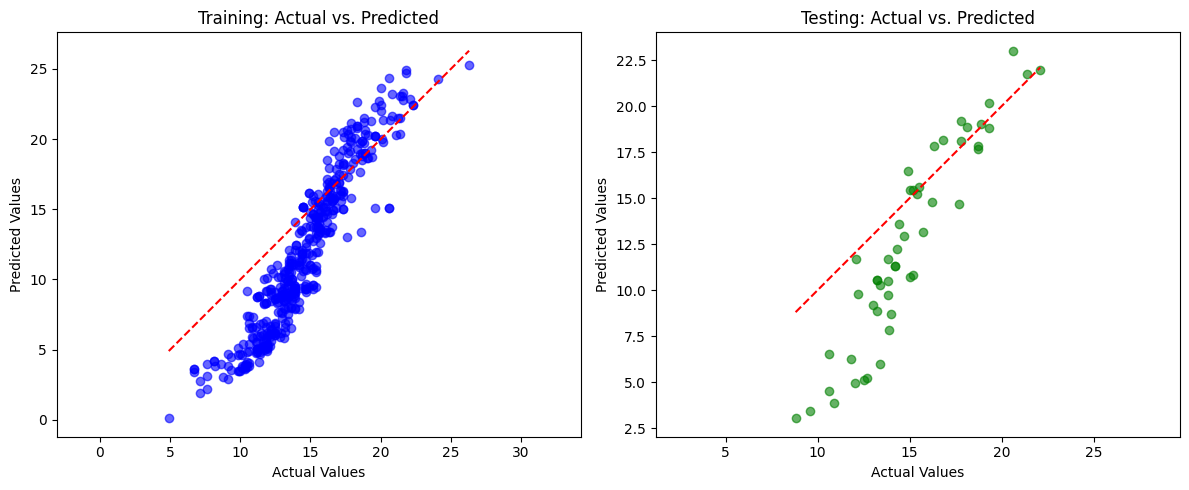

In [114]:
# Scatter plot for actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training: Actual vs. Predicted')
plt.axis('equal')

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing: Actual vs. Predicted')
plt.axis('equal')

plt.tight_layout()
plt.show()